<a href="https://colab.research.google.com/github/fatenchtioui/Proj/blob/master/Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class distribution before SMOTE: [5560 6277 5610 5708 5529 5040 5480 5790 5468 5538]
Class distribution after SMOTE: [6277 6277 6277 6277 6277 6277 6277 6277 6277 6277]


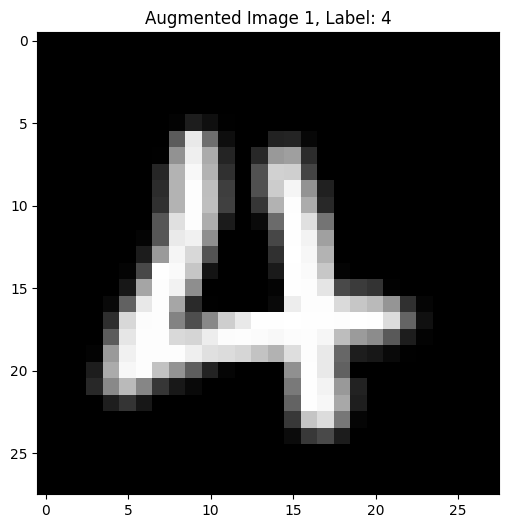

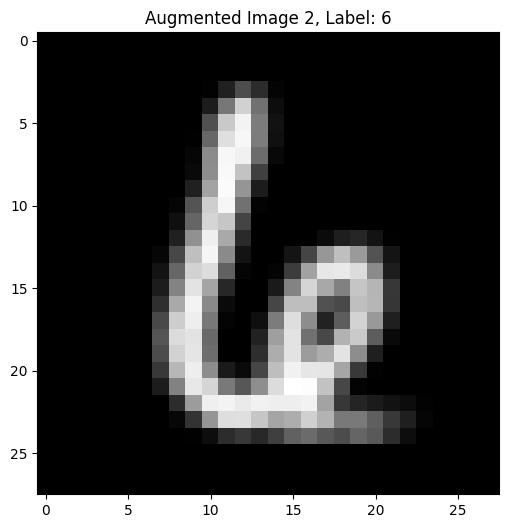

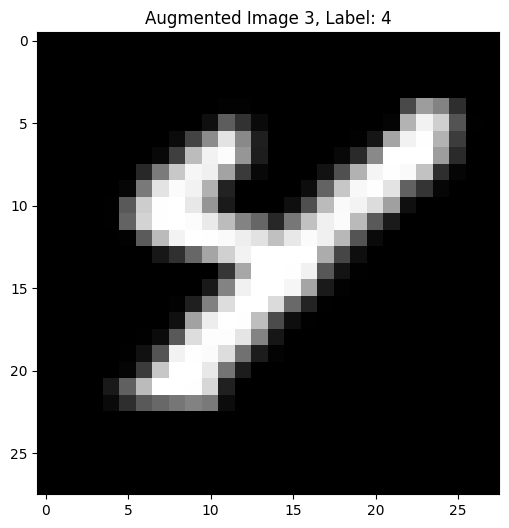

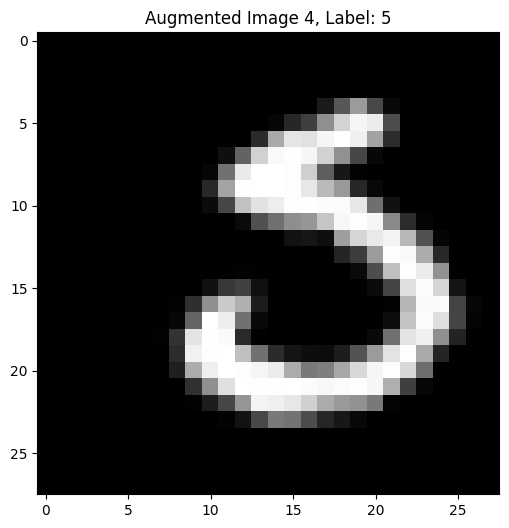

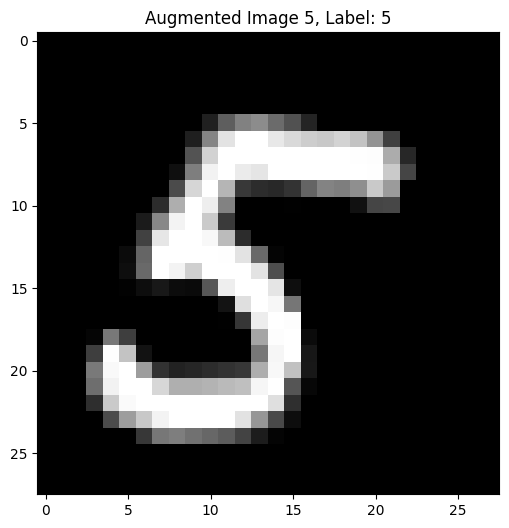

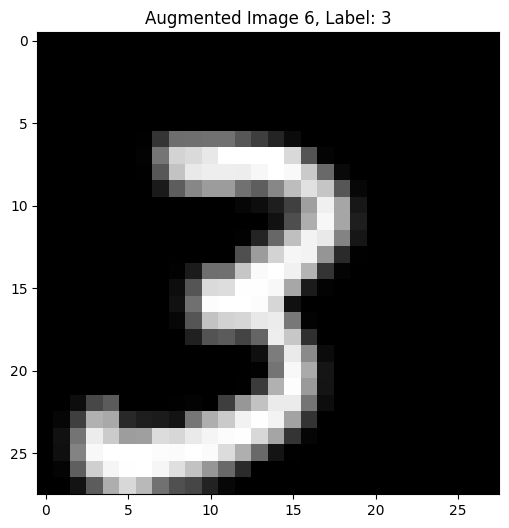

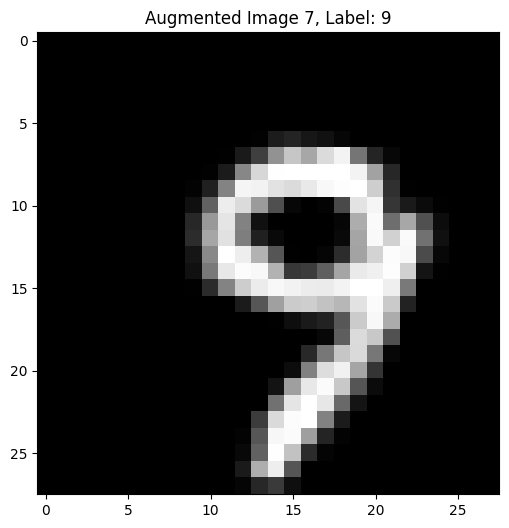

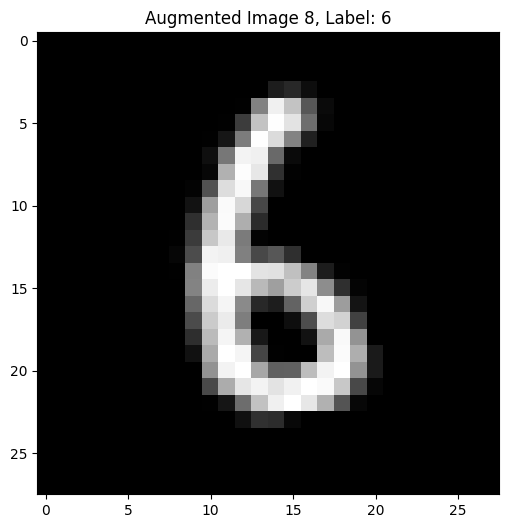

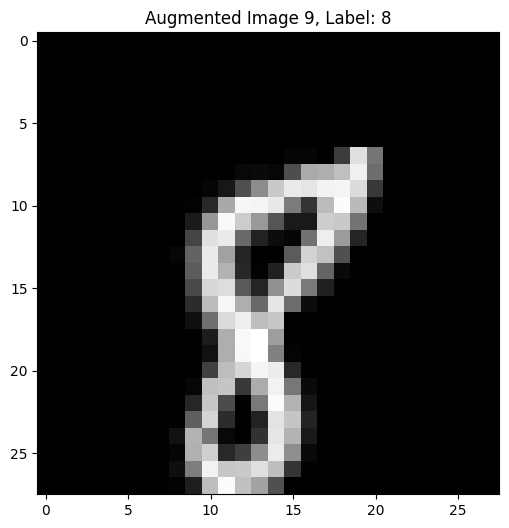

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Combine features and labels for SMOTE
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", np.bincount(y_train))

# Reshape images for SMOTE
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)

# Reshape back to the original shape
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 28, 28, 1)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

# Fit the generator on the training data
datagen.fit(X_train_resampled)

# Display augmented images
num_augmented_images = 9
i = 0

for X_batch, y_batch in datagen.flow(X_train_resampled, y_train_resampled, batch_size=1):
    plt.figure(figsize=(6, 6))
    plt.imshow(X_batch[0].reshape(28, 28), cmap='gray')
    plt.title(f'Augmented Image {i + 1}, Label: {y_batch[0]}')
    i += 1
    if i % num_augmented_images == 0:
        break

plt.show()
